# New Tables: Industry level

* Faire les tableaux suivants:
  * Tableau 4: Kuznet: benchmark → Revision
      * Trouver un tableau avec les déciles pour montrer:
        * turning point croissant pour des villes avec une dominance étatique de plus en plus large
      * Regarder si gdp/cap prix constant
      * Indiquer les turning points dans les tableaux
* Partie 6:
  * Tableau 8: 
    * estimer 2 modèles sur des échantillons differents
      * modèle 1 →  TCZ * Polluted * Period
      * modèle 2 → Target * polluted*Period  
    * Echantillonnage → prendre soit industry soit city industry
      * Big
        * Via Herfhindal 
          * benchmark →Revision
      * Foreign 
        * via output/capital/employment 
      * SOEs
        * via output/capital/employment 
      * SPZ
      * Coastal
    * Chaque tableau avec Panel A pour supérieur threshold, Panel B pour inférieur threshold
  * Tableau 9:
    * Enlever SPZ & Coastal
    * estimer 2 modèles sur des échantillons differents
      * modèle 1 →  TCZ * Polluted * Period
      * modèle 2 → Target * polluted*Period  
    * Idem tableau 8
    
## Summary

### Size

| Industry                   | Size         |              |              |              |              |              |
|----------------------------|--------------|--------------|--------------|--------------|--------------|--------------|
|                            | Below Median | Below Median | Below Median | Above Median | Above Median | Above Median |
| TCZ * Period * Polluted    | -            |              | -            | -            |              | -            |
| Target * Period * Polluted |              | -***         | -***         |              | -*           | -            |

### Output

|                            | Below median |     |         |      |         |     | Above Median |     |         |      |         |      |
|----------------------------|--------------|-----|---------|------|---------|-----|--------------|-----|---------|------|---------|------|
|                            | Foreign      | SOE | Foreign | SOE  | Foreign | SOE | Foreign      | SOE | Foreign | SOE  | Foreign | SOE  |
| TCZ * Period * Polluted    | +            | -*  |         |      | +       | -   | -***         | -   |         |      | -***    | +    |
| Target * Period * Polluted |              |     | -***    | -*** | -***    | -*  |              |     | -       | -*** | -       | -*** |

### Capital

|                            | Below median |      |         |     |         |      | Above Median |     |         |      |         |      |
|----------------------------|--------------|------|---------|-----|---------|------|--------------|-----|---------|------|---------|------|
|                            | Foreign      | SOE  | Foreign | SOE | Foreign | SOE  | Foreign      | SOE | Foreign | SOE  | Foreign | SOE  |
| TCZ * Period * Polluted    | -            | -*** |         |     | +       | -*** | -***         | +   |         |      | -***    | **   |
| Target * Period * Polluted |              |      | -***    | -*  | -***    | -    |              |     | -       | -*** | -       | -*** |


### employment

|                            | Below median |      |         |     |         |     | Above Median |     |         |      |         |      |
|----------------------------|--------------|------|---------|-----|---------|-----|--------------|-----|---------|------|---------|------|
|                            | Foreign      | SOE  | Foreign | SOE | Foreign | SOE | Foreign      | SOE | Foreign | SOE  | Foreign | SOE  |
| TCZ * Period * Polluted    | -            | -*** |         |     | +       | -** | -*           | +*  |         |      | -       | +*** |
| Target * Period * Polluted |              |      | -***    | -   | -***    | -   |              |     | -       | -*** | -       | -*** |

In [1]:
import pandas as pd
from Fast_connectCloud import connector
import numpy as np

In [2]:
import sys
sys.path.insert(0,'..')

In [3]:
import functions.latex_beautify as lb

%load_ext autoreload
%autoreload 2

In [4]:
gs = connector.open_connection(online_connection = False,
                              path_credential = '/Users/thomas/Google Drive/Projects/Client_Oauth/Google_auth')

service = gs.connect_remote('GCP')

Service account storage and Bigquery are now connected. 
Service account storage is stored as <google.cloud.storage.client.Client object at 0xa162f1050> and accessible with "Storage_account" 
Service account Bigquery is stored as <google.cloud.bigquery.client.Client object at 0xa162f1810> and accessible with "bigquery_account"


In [5]:
%put df_final --to R

from GoogleDrivePy.google_platform import connect_cloud_platform
project = 'valid-pagoda-132423'
gcp = connect_cloud_platform.connect_console(project = project, 
                                             service_account = service['GoogleCloudP'])    
query = (
          "SELECT * "
            "FROM China.SBC_pollution_China "

        )

df_final = gcp.upload_data_from_bigquery(query = query, location = 'US')
df_final.head()

,year,Period,Province_en,Lower_location,Larger_location,Coastal,cityen,geocode4_corr,TCZ_c,target_c,effort_c,industry,ind2,Short,output_fcit,capital_fcit,labour_fcit,out_share_SOE,cap_share_SOE,lab_share_SOE,tso2_cit,tso2_i,tCOD_cit,twaste_water_cit,polluted_di,polluted_mi,polluted_thre,FE_c_i,FE_t_i,FE_t_c
0,2002,Before,Shanxi,Central,Central,False,Yuncheng,1408,TCZ,0.485030,Above,3329,33,Smelting Non-ferrous Metals,0.000687,0.000293,0.00036,0.027567,0.221018,0.113467,24500,168934.454545,0.0,500,Above,Below,Above,11104,1573,889
1,2006,After,Hunan,Central,Central,False,Xiangtan,4303,TCZ,0.092754,Below,3329,33,Smelting Non-ferrous Metals,0.000950,0.000148,0.00023,0.027567,0.221018,0.113467,2304,168934.454545,0.0,300,Above,Below,Above,11105,1574,420
2,2007,After,Hunan,Central,Central,False,Xiangtan,4303,TCZ,0.092754,Below,3329,33,Smelting Non-ferrous Metals,0.001715,0.000365,0.00023,0.027567,0.221018,0.113467,2304,168934.454545,0.0,240,Above,Below,Above,11105,1572,421
3,2007,After,Liaoning,Northeast,Eastern,True,Jinzhou,2107,TCZ,0.080512,Below,3329,33,Smelting Non-ferrous Metals,0.007730,0.001296,0.00089,0.027567,0.221018,0.113467,3200,168934.454545,0.0,0,Above,Below,Above,11103,1572,287
4,2002,Before,Liaoning,Northeast,Eastern,True,Shenyang,2101,TCZ,0.230076,Above,3329,33,Smelting Non-ferrous Metals,0.000997,0.000052,0.00135,0.027567,0.221018,0.113467,3840,168934.454545,0.0,3500,Above,Below,Above,11106,1573,432


/Users/thomas/anaconda3/lib/python3.7/site-packages/pyarrow/feather.py:83: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(df, _pandas_api.pd.SparseDataFrame):


Get the industries available in our dataset, so that we match the firm level table

In [6]:
list_industry = df_final['industry'].to_list()

In [7]:
options(warn=-1)
library(tidyverse)
library(lfe)
library(lazyeval)
library('progress')

path = "../functions/SBC_pollution_R.R"
source(path)
path = "../functions/SBC_pollutiuon_golatex.R"
source(path)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.0     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘lazyeval’


The following objects are masked from ‘package:purrr’:

    is_atomic, is_formula



Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 




In [8]:
df_final <- df_final %>% 
    mutate_if(is.character, as.factor) %>%
    mutate_at(vars(starts_with("FE")), as.factor) %>%
    mutate(
         Period = relevel(Period, ref='Before'),
         TCZ_c = relevel(TCZ_c, ref='No_TCZ'),
         effort_c = relevel(effort_c, ref='Below'),
         polluted_di = relevel(polluted_di, ref='Below'),
         polluted_mi = relevel(polluted_mi, ref='Below'),
         polluted_thre = relevel(polluted_thre, ref='Below'),
  )
head(df_final)

,year,Period,Province_en,Lower_location,Larger_location,Coastal,cityen,geocode4_corr,TCZ_c,target_c,⋯,tso2_cit,tso2_i,tCOD_cit,twaste_water_cit,polluted_di,polluted_mi,polluted_thre,FE_c_i,FE_t_i,FE_t_c
,<dbl>,<fct>,<fct>,<fct>,<fct>,<lgl>,<fct>,<dbl>,<fct>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2002,Before,Shanxi,Central,Central,FALSE,Yuncheng,1408,TCZ,0.48502998,⋯,24500,168934.5,0,500,Above,Below,Above,11104,1573,889
2,2006,After,Hunan,Central,Central,FALSE,Xiangtan,4303,TCZ,0.09275420,⋯,2304,168934.5,0,300,Above,Below,Above,11105,1574,420
3,2007,After,Hunan,Central,Central,FALSE,Xiangtan,4303,TCZ,0.09275420,⋯,2304,168934.5,0,240,Above,Below,Above,11105,1572,421
4,2007,After,Liaoning,Northeast,Eastern,TRUE,Jinzhou,2107,TCZ,0.08051164,⋯,3200,168934.5,0,0,Above,Below,Above,11103,1572,287
5,2002,Before,Liaoning,Northeast,Eastern,TRUE,Shenyang,2101,TCZ,0.23007570,⋯,3840,168934.5,0,3500,Above,Below,Above,11106,1573,432
6,2002,Before,Guangdong,Coastal,Eastern,TRUE,Meizhou,4414,No_TCZ,0.02596999,⋯,72752,168934.5,15500,115000,Above,Below,Above,11107,1573,909


# Partie 6

## Tableau 8 A and B 

Estimate the following models using different subsamples:

### Model A 

$$
Log SO2 emission _{i k t}=\alpha\left(\text { Period } \times \text { TCZ }_{i} \times \text { Polluting sectors }_{k} \right)+\nu_{i k}+\lambda_{i t}+\phi_{k t}+\epsilon_{i k t}
$$

$$
Log SO2 emission _{i k t}=\alpha\left(\text { Period } \times \text { TCZ }_{i} \times \text { Polluting sectors }_{k} \times \text{ Share X}_i \right)+\nu_{i k}+\lambda_{i t}+\phi_{k t}+\epsilon_{i k t}
$$

* Size
    * Via Herfhindal 
        * benchmark →Revision
* Foreign 
    * via output/capital/employment 
* SOEs
    * via output/capital/employment 
* SPZ
* Coastal

## Load Data

### Compute Herfhindal: proxy Size

$$
H=\sum_{i=1}^{N} s_{i}^{2}
$$

where $s_i$ is the market share of industry $i$ in a city, and $N$ is the number of firms. 

We proceed as follow:
- Step 1: Compute the share [output, capital, employment] by city-industry: `market_share_cit`
- Step 2: compute the sum of squared market share by industry: `Herfindahl_it`
- Step 3: Compute the average across time: `Herfindahl_i`
- Step 4: Compute the deciles of step 3: `decile_herfhindal_i`
    - Low decile implies a low concentration within sectors
    - High decile implies a high concentration within sectors

In [9]:
query = """
WITH sum_cit AS (
  SELECT geocode4_corr, cic, sum(output) as sum_o_cit, year
  FROM China.asif_firm_china 
  WHERE year >= 2002 AND year <= 2007
  AND output > 0 
    AND fa_net > 0 
    AND employment > 0 
  GROUP BY geocode4_corr, cic, year
) 
SELECT * 
FROM 
  (WITH sum_it AS (
    SELECT cic, SUM(sum_o_cit) as sum_o_it, year
    FROM sum_cit
    WHERE year >= 2002 AND year <= 2007
    GROUP BY year, cic
)
SELECT *
FROM
  (WITH ms_cit AS (
    SELECT  sum_cit.cic, sum_cit.geocode4_corr, sum_cit.year,
    sum_cit.sum_o_cit/NULLIF(sum_it.sum_o_it, 0) as market_share_cit
    FROM sum_cit
    LEFT JOIN sum_it
ON (
sum_cit.year = sum_it.year AND 
sum_cit.cic = sum_it.cic
)
)
SELECT *
FROM
  (WITH agg_1 AS (
SELECT cic, SUM(POW(market_share_cit, 2)) as Herfindahl_it,
year
FROM ms_cit
GROUP BY year, cic
ORDER BY year, cic 
)
SELECT *
FROM (
SELECT cic as industry,
AVG(Herfindahl_it) as Herfindahl_i
FROM agg_1
GROUP BY cic
ORDER BY cic
)

)))
"""
df_herfhindal = (gcp.upload_data_from_bigquery(query = query,
                                         location = 'US')
                 .loc[lambda x: x['industry'].isin(list_industry)]
                )
df_herfhindal.shape

(296, 2)

### Compute Ownership: proxy Foreign/SOE

$$\sum output_{io}/ \sum output_i$$

- with $i$ stands for industry
- $o$ stands for ownership (Foreign vs Domestic or SOE vs private)



#### Foreign vs domestic

We proceed as follow:
- Step 1: Compute the share [output, capital, employment] by industry, ownership (Foreign/Domestic): `Share_X_io`
- Step 2: Compute dummy when share Foreign above share domestic by industry
- Step 3: Compute decile by industry-ownership
    - Note,  high decile in Foreign means the industry has relatively high share of foreign output, but not in absolule value as in step 2. A decile 9 in foreign can be a decile 2 or 3 in Domestic

In [10]:
query_share_foreign = """ 
WITH sum_io AS (
  SELECT 
    case WHEN ownership = 'Foreign' THEN 'FOREIGN' ELSE 'DOMESTIC' END AS OWNERSHIP, 
    SUM(output / 10000000) as output_io, 
    SUM(fa_net / 10000000) as fa_net_io, 
    SUM(employment / 100000) as employment_io,
    cic
  FROM 
    China.asif_firm_china 
  WHERE 
    year >= 2002 
    AND year <= 2007 
    AND output > 0 
    AND fa_net > 0 
    AND employment > 0 
  GROUP BY 
    OWNERSHIP, 
    cic
) 
SELECT 
  * 
FROM 
  (
    WITH sum_i AS(
      SELECT 
        SUM(output_io) as output_i, 
        SUM(fa_net_io) as fa_net_i, 
        SUM(employment_io) as employment_i, 
        cic AS cic_b
      FROM 
        sum_io 
      GROUP BY 
        cic
    ) 
    SELECT 
      * 
    FROM 
      (
        WITH share_io AS(
          SELECT 
            OWNERSHIP, 
            output_io / output_i AS share_output_io, 
            fa_net_io / fa_net_i AS share_fa_net_io, 
            employment_io / employment_i AS share_employement_io, 
            cic
          FROM 
            sum_io 
            LEFT JOIN sum_i ON sum_io.cic = sum_i.cic_b 
        ) 
        SELECT 
        cic as industry,
        OWNERSHIP,  
        share_output_io,
        share_fa_net_io,
        share_employement_io
        FROM share_io
        WHERE OWNERSHIP = 'FOREIGN'
        )
        )
"""
df_share_foreign = (gcp.upload_data_from_bigquery(query = query_share_foreign,
                                         location = 'US')
                    .loc[lambda x: x['industry'].isin(list_industry)]
                   )
df_share_foreign.shape
#df_share_foreign['rank_share_output_i'].value_counts().sort_index()

(296, 5)

In [11]:
#df_share_foreign_ = (df_share_foreign
# .set_index(['industry', 'OWNERSHIP'])
# .drop(columns = ['rank_share_output_i',
#                  'rank_share_capital_i',
#                  'rank_share_employement_i'])
# .unstack(-1)
# .fillna(0)
# .assign(
# output = lambda x: np.where(
#     x.iloc[:,1] > x.iloc[:,0],
#     'Above', 'Below'
# ),
#     capital = lambda x: np.where(
#     x.iloc[:,3] > x.iloc[:,0],
#     'Above', 'Below'
# ),
#     employment = lambda x: np.where(
#     x.iloc[:,5] > x.iloc[:,0],
#     'Above', 'Below'
# )
# )
# .iloc[:, -3:]
# .droplevel(level = 1, axis = 1)
# .reset_index()
#)
#for i in ['output','capital', 'employment']:
#    print(df_share_foreign_[i].value_counts().sort_index())

In [12]:
#df_share_foreign =  (df_share_foreign
# .set_index(['industry','OWNERSHIP'])
# .drop(columns = ['share_output_io',
#                  'share_fa_net_io',
#                  'share_employement_io'])
# .xs('FOREIGN', level='OWNERSHIP', axis=0)
# .reset_index()
# .merge(df_share_foreign_)
#)

#### SOE

We proceed as follow:
- Step 1: Compute the share [output, capital, employment] by industry, ownership (SOE/Private): `Share_X_io`
- Step 2: Compute dummy when share SOE above share Private by industry
- Step 3: Compute decile by industry-ownership
    - Note,  high decile in SOE means the industry has relatively high share of SOE output, but not in absolule value as in step 2. A decile 9 in SOE can be a decile 2 or 3 in Private

In [13]:
query_share_soe = """ 
WITH sum_io AS (
  SELECT 
    case WHEN ownership = 'SOE' THEN 'SOE' ELSE 'DOMESTIC' END AS OWNERSHIP, 
    SUM(output / 10000000) as output_io, 
    SUM(fa_net / 10000000) as fa_net_io, 
    SUM(employment / 100000) as employment_io,
    cic
  FROM 
    China.asif_firm_china 
  WHERE 
    year >= 2002 
    AND year <= 2007 
    AND output > 0 
    AND fa_net > 0 
    AND employment > 0 
  GROUP BY 
    OWNERSHIP, 
    cic
) 
SELECT 
  * 
FROM 
  (
    WITH sum_i AS(
      SELECT 
        SUM(output_io) as output_i, 
        SUM(fa_net_io) as fa_net_i, 
        SUM(employment_io) as employment_i, 
        cic AS cic_b
      FROM 
        sum_io 
      GROUP BY 
        cic
    ) 
    SELECT 
      * 
    FROM 
      (
        WITH share_io AS(
          SELECT 
            OWNERSHIP, 
            output_io / output_i AS share_output_io, 
            fa_net_io / fa_net_i AS share_fa_net_io, 
            employment_io / employment_i AS share_employement_io, 
            cic
          FROM 
            sum_io 
            LEFT JOIN sum_i ON sum_io.cic = sum_i.cic_b 
        ) 
        SELECT 
        * 
        FROM(
        SELECT 
        cic as industry,
        OWNERSHIP,  
          share_output_io,
          share_fa_net_io,
          share_employement_io
        FROM share_io
        WHERE OWNERSHIP = 'SOE'
        )
        )
        )
"""
df_share_soe = (gcp.upload_data_from_bigquery(query = query_share_soe,
                                         location = 'US')
                .loc[lambda x: x['industry'].isin(list_industry)]
                   )
df_share_soe.shape
#df_share_soe['rank_share_output_i'].value_counts().sort_index()

(296, 5)

In [14]:
#df_share_soe_ = (df_share_soe
# .set_index(['industry', 'OWNERSHIP'])
# .drop(columns = ['rank_share_output_i',
#                  'rank_share_capital_i',
#                  'rank_share_employement_i'])
# .unstack(-1)
# .fillna(0)
# .assign(
# output = lambda x: np.where(
#     x.iloc[:,1] > x.iloc[:,0],
#     'Above', 'Below'
# ),
#     capital = lambda x: np.where(
#     x.iloc[:,3] > x.iloc[:,0],
#     'Above', 'Below'
# ),
#     employment = lambda x: np.where(
#     x.iloc[:,5] > x.iloc[:,0],
#     'Above', 'Below'
# )
# )
# .iloc[:, -3:]
# .droplevel(level = 1, axis = 1)
# .reset_index()
#)

#for i in ['output','capital', 'employment']:
#    print(df_share_soe_[i].value_counts().sort_index())

In [15]:
#df_share_soe = (df_share_soe
# .set_index(['industry','OWNERSHIP'])
# .drop(columns = ['share_output_io',
#                  'share_fa_net_io',
#                  'share_employement_io'])
# .xs('SOE', level='OWNERSHIP', axis=0)
# .reset_index()
# .merge(df_share_soe_)
 #.loc[lambda x: x.index.get_level_values('OWNERSHIP').isin(['FOREIGN'])]
#)
#df_share_soe.head()

### Load TCZ_list_china from Google Spreadsheet

Feel free to add description about the dataset or any usefull information.

Profiling will be available soon for this dataset

In [16]:
### Please go here https://docs.google.com/spreadsheets/d/15bMeS2cMfGfYJkjuY6wOMzcAUWZNRGpO03hZ8rpgv0Q
### To change the range

#sheetid = '15bMeS2cMfGfYJkjuY6wOMzcAUWZNRGpO03hZ8rpgv0Q'
#sheetname = 'All_cities'

#df_TCZ_list_china = gdr.upload_data_from_spreadsheet(sheetID = sheetid,
#sheetName = sheetname,
#	 to_dataframe = True)
#df_TCZ_list_china.to_csv('df_TCZ_list_china.csv', index = False)

In [17]:
df_TCZ_list_china = read_csv('../df_TCZ_list_china.csv') %>% 
select(-c(TCZ, Province)) %>% 
left_join(df_final)

Parsed with column specification:
cols(
  Province = col_character(),
  City = col_character(),
  geocode4_corr = col_double(),
  TCZ = col_double(),
  SPZ = col_double()
)

Joining, by = "geocode4_corr"



### Add to table

In [18]:
%put df_herfhindal_final --to R
df_herfhindal_final = (df_final.merge(df_herfhindal,
                                     on=['industry'],
                                     how='left',
                                     indicator=True
                                     )
                       .assign(
                       decile_herfhindal_i = lambda x:
                           pd.qcut(x['Herfindahl_i'],10, labels=False)
                       )
                      )

INFO: NumExpr defaulting to 8 threads.

In [19]:
print('Median: {}'.format(df_herfhindal_final['Herfindahl_i'].median()))
print(pd.qcut(df_herfhindal_final['Herfindahl_i'],
        10).drop_duplicates().sort_values().reset_index(drop = True))

df_herfhindal_final['decile_herfhindal_i'].value_counts().sort_index()

Median: 0.053310959124880056
0    (0.011200000000000002, 0.029]
1                  (0.029, 0.0328]
2                 (0.0328, 0.0401]
3                 (0.0401, 0.0467]
4                 (0.0467, 0.0533]
5                  (0.0533, 0.059]
6                  (0.059, 0.0702]
7                 (0.0702, 0.0867]
8                   (0.0867, 0.11]
9                    (0.11, 0.645]
Name: Herfindahl_i, dtype: category
Categories (10, interval[float64]): [(0.011200000000000002, 0.029] < (0.029, 0.0328] < (0.0328, 0.0401] <
                                     (0.0401, 0.0467] ... (0.059, 0.0702] < (0.0702, 0.0867] <
                                     (0.0867, 0.11] < (0.11, 0.645]]


0    3109
1    3091
2    3057
3    3078
4    3222
5    2897
6    3026
7    3159
8    2986
9    3051
Name: decile_herfhindal_i, dtype: int64

In [20]:
df_herfhindal_r <- df_herfhindal_final %>% 
    mutate_if(is.character, as.factor) %>%
    mutate_at(vars(starts_with("FE")), as.factor) %>%
    mutate(
         Period = relevel(Period, ref='Before'),
         TCZ_c = relevel(TCZ_c, ref='No_TCZ'),
         effort_c = relevel(effort_c, ref='Below'),
         polluted_di = relevel(polluted_di, ref='Below'),
         polluted_mi = relevel(polluted_mi, ref='Below'),
         polluted_thre = relevel(polluted_thre, ref='Below'),
  )

In [21]:
df_share_soe.columns

Index(['industry', 'OWNERSHIP', 'share_output_io', 'share_fa_net_io',
       'share_employement_io'],
      dtype='object')

In [22]:
%put df_final_SOE --to R
df_final_SOE = (df_final.merge(
    df_share_soe,
    on = ['industry'],
    how = 'left',
    indicator = True
)
                .assign(
                       output = lambda x:
                           pd.qcut(x['share_output_io'],10, labels=False),
                       capital = lambda x:
                           pd.qcut(x['share_fa_net_io'],10, labels=False),
                       employment = lambda x:
                           pd.qcut(x['share_employement_io'],10, labels=False),
                       )

)
for i in ['output', 'capital', 'employment']:
    if i == 'output':
        v = 'share_output_io'
    elif i =='capital':
        v = 'share_fa_net_io'
    else:
        v = 'share_employement_io'
    print('Median: {}'.format(df_final_SOE[v].median()))
    print(pd.qcut(df_final_SOE[v],
        10).drop_duplicates().sort_values().reset_index(drop = True))

    print(df_final_SOE[i].value_counts().sort_index())

Median: 0.08328115856685243
0    (-0.0009556, 0.0119]
1        (0.0119, 0.0242]
2        (0.0242, 0.0387]
3        (0.0387, 0.0584]
4        (0.0584, 0.0833]
5        (0.0833, 0.0984]
6         (0.0984, 0.135]
7          (0.135, 0.208]
8          (0.208, 0.392]
9          (0.392, 0.992]
Name: share_output_io, dtype: category
Categories (10, interval[float64]): [(-0.0009556, 0.0119] < (0.0119, 0.0242] < (0.0242, 0.0387] <
                                     (0.0387, 0.0584] ... (0.0984, 0.135] < (0.135, 0.208] <
                                     (0.208, 0.392] < (0.392, 0.992]]
0    3131
1    3026
2    3333
3    2787
4    3306
5    2918
6    3017
7    3149
8    3300
9    2709
Name: output, dtype: int64
Median: 0.14363309012410683
0    (0.0001299999999999999, 0.0277]
1                   (0.0277, 0.0557]
2                   (0.0557, 0.0871]
3                    (0.0871, 0.127]
4                     (0.127, 0.144]
5                     (0.144, 0.198]
6                     (0.198, 0.247

In [23]:
df_final_SOE <- df_final_SOE %>% 
    mutate_if(is.character, as.factor) %>%
    mutate_at(vars(starts_with("FE")), as.factor) %>%
    mutate(
         Period = relevel(Period, ref='Before'),
         TCZ_c = relevel(TCZ_c, ref='No_TCZ'),
         effort_c = relevel(effort_c, ref='Below'),
         polluted_di = relevel(polluted_di, ref='Below'),
         polluted_mi = relevel(polluted_mi, ref='Below'),
         polluted_thre = relevel(polluted_thre, ref='Below'),
  )

In [24]:
%put df_final_FOREIGN --to R
df_final_FOREIGN = (df_final.merge(
    df_share_foreign,
    on = ['industry'],
    how = 'left',
    indicator = True
)
                .assign(
                       output = lambda x:
                           pd.qcut(x['share_output_io'],10, labels=False),
                       capital = lambda x:
                           pd.qcut(x['share_fa_net_io'],10, labels=False),
                       employment = lambda x:
                           pd.qcut(x['share_employement_io'],10, labels=False),
                       )

)
for i in ['output', 'capital', 'employment']:
    if i == 'output':
        v = 'share_output_io'
    elif i =='capital':
        v = 'share_fa_net_io'
    else:
        v = 'share_employement_io'
    print('Median: {}'.format(df_final_FOREIGN[v].median()))
    print(pd.qcut(df_final_FOREIGN[v],
        10).drop_duplicates().sort_values().reset_index(drop = True))

    print(df_final_FOREIGN[i].value_counts().sort_index())

Median: 0.13017849085489788
0    (-0.00012399999999999998, 0.0318]
1                     (0.0318, 0.0606]
2                     (0.0606, 0.0867]
3                      (0.0867, 0.104]
4                        (0.104, 0.13]
5                        (0.13, 0.146]
6                       (0.146, 0.174]
7                       (0.174, 0.214]
8                       (0.214, 0.276]
9                       (0.276, 0.507]
Name: share_output_io, dtype: category
Categories (10, interval[float64]): [(-0.00012399999999999998, 0.0318] < (0.0318, 0.0606] < (0.0606, 0.0867] <
                                     (0.0867, 0.104] ... (0.146, 0.174] < (0.174, 0.214] <
                                     (0.214, 0.276] < (0.276, 0.507]]
0    3265
1    2933
2    3134
3    3079
4    2973
5    3033
6    3104
7    3036
8    3078
9    3041
Name: output, dtype: int64
Median: 0.13646252727206287
0    (-0.000392, 0.0289]
1        (0.0289, 0.056]
2        (0.056, 0.0777]
3        (0.0777, 0.108]
4         (0.108

In [25]:
df_final_FOREIGN <- df_final_FOREIGN %>% 
    mutate_if(is.character, as.factor) %>%
    mutate_at(vars(starts_with("FE")), as.factor) %>%
    mutate(
         Period = relevel(Period, ref='Before'),
         TCZ_c = relevel(TCZ_c, ref='No_TCZ'),
         effort_c = relevel(effort_c, ref='Below'),
         polluted_di = relevel(polluted_di, ref='Below'),
         polluted_mi = relevel(polluted_mi, ref='Below'),
         polluted_thre = relevel(polluted_thre, ref='Below'),
  )

## Table 8 Model A: Panel A



### Decile

#### Size

In [26]:
change_target <- function(table){
    check_target <- grep("PeriodAfter:polluted_threAbove:target_c$", rownames(table$coef))
    
    if (length(check_target) !=0) {
    rownames(table$coefficients)[check_target] <- 'target_c:PeriodAfter:polluted_threAbove'
    rownames(table$beta)[check_target] <- 'target_c:PeriodAfter:polluted_threAbove'
}
    return (table)
}

In [27]:
cat <- 'Size'
df_to_filter <- df_herfhindal_r

### inferior median
t1 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(decile_herfhindal_i <= 5),
             exactDOF=TRUE)
t1 <-change_target(t1)
t2 <- felm(formula=log(tso2_cit) ~ 
           target_c  * Period * polluted_thre 
           + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(decile_herfhindal_i <= 5),
             exactDOF=TRUE)
t2 <-change_target(t2)

t3 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + target_c  * Period * polluted_thre 
           + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(decile_herfhindal_i <= 5),
             exactDOF=TRUE)
t3 <-change_target(t3)

### superior median
t4 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(decile_herfhindal_i > 5),
             exactDOF=TRUE)
t4 <-change_target(t4)

t5 <- felm(formula=log(tso2_cit) ~ 
           target_c  * Period * polluted_thre 
           + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(decile_herfhindal_i > 5),
             exactDOF=TRUE)
t5 <-change_target(t5)

t6 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(decile_herfhindal_i > 5),
             exactDOF=TRUE)
t6 <-change_target(t6)

tables <- list(t1, t2, t3,t4, t5, t6)

fe1 <- list(
    c("City fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("Industry fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("Year fixed effects","Yes", "Yes", "Yes", "Yes", "Yes", "Yes")
            )


table_1 <- go_latex(tables,
                dep_var = "Dependent variable \\text { SO2 emission }_{i k t}",
                title=paste0("Median Herfhindal - ", cat),
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name="table_1.txt"
                            )

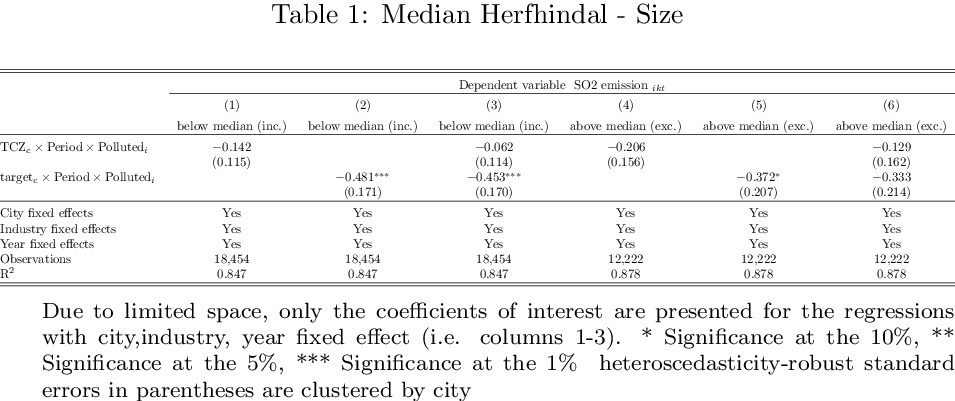

In [28]:
import os
decile=['& below median (inc.)', 'below median (inc.)', 'below median (inc.)',
        'above median (exc.)', 'above median (exc.)', 'above median (exc.)']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 1,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

#### Foreign


In [29]:
cat <- 'Foreign'
df_to_filter <- df_final_FOREIGN

fe1 <- list(
    c("City fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("Industry fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("Year fixed effects","Yes", "Yes", "Yes", "Yes", "Yes", "Yes")
             )

### Remove text, tex and pdf files
toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
file.remove(toremove)

for (var in list('output', 'capital', 'employment')){
    
    ### inferior median
    t1 <- felm(formula=log(tso2_cit) ~ 
               TCZ_c * Period * polluted_thre 
               + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(get(var) <= 5),
             exactDOF=TRUE)
    t1 <-change_target(t1)
    t2 <- felm(formula=log(tso2_cit) ~ 
           target_c  * Period * polluted_thre 
               + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(get(var) <= 5),
             exactDOF=TRUE)
    t2 <-change_target(t2)
    t3 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(get(var) <= 5),
             exactDOF=TRUE)
    t3 <-change_target(t3)

    ### superior median
    t4 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(get(var) > 5),
             exactDOF=TRUE)
    t4 <-change_target(t4)
    t5 <- felm(formula=log(tso2_cit) ~ 
           target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(get(var) > 5),
             exactDOF=TRUE)
    t5 <-change_target(t5)

    t6 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(get(var) > 5),
             exactDOF=TRUE)
    t6 <-change_target(t6)
    
    if (var == 'output'){
        tables_o <- list(t1, t2, t3,t4, t5, t6)
        table_1 <- go_latex(tables_o,
                dep_var = "Dependent variable \\text { SO2 emission }_{i k t}",
                title=paste0("Median ", var, "- ", cat),
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name="table_1.txt"
                           )
    }else if ( var == 'capital'){
        tables_c <- list(t1, t2, t3,t4, t5, t6)
        table_1 <- go_latex(tables_c,
                dep_var = "Dependent variable \\text { SO2 emission }_{i k t}",
                title=paste0("Median ", var, "- ", cat),
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name="table_2.txt"
                            )
    }else{
        tables_e <- list(t1, t2, t3,t4, t5, t6)
        table_1 <- go_latex(tables_e,
                dep_var = "Dependent variable \\text { SO2 emission }_{i k t}",
                title=paste0("Median ", var, "- ", cat),
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name="table_3.txt"
                            )
    }
}

[1] TRUE TRUE TRUE

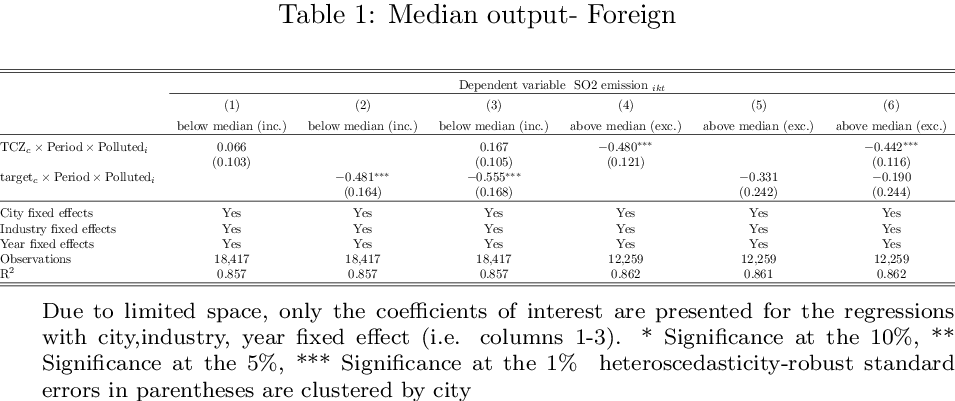

In [30]:
import os
decile=['& below median (inc.)', 'below median (inc.)', 'below median (inc.)',
        'above median (exc.)', 'above median (exc.)', 'above median (exc.)']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 1,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

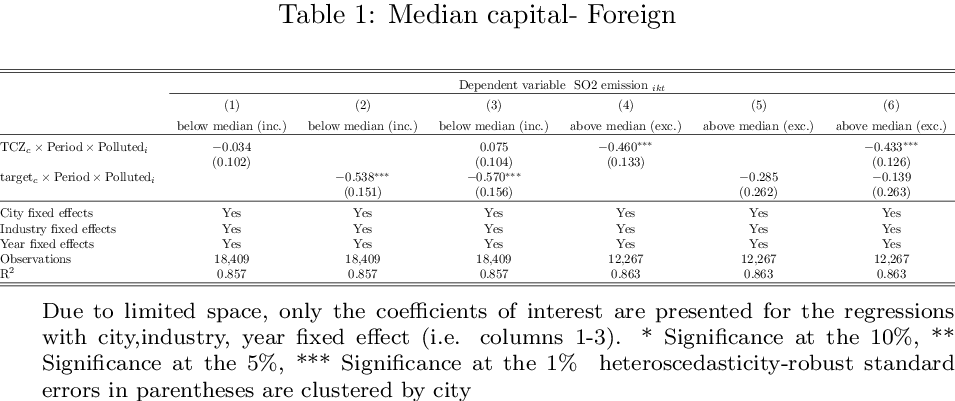

In [31]:
lb.beautify(table_number = 2,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
            jupyter_preview = True,
            resolution = 200)

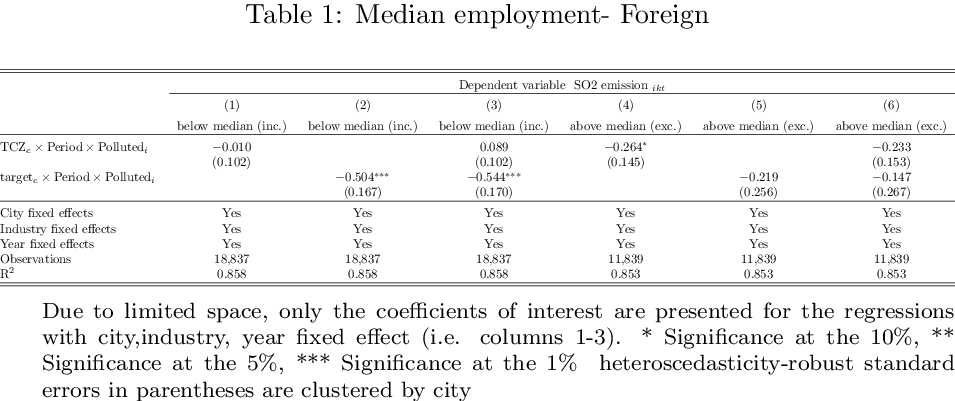

In [32]:
lb.beautify(table_number = 3,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
            jupyter_preview = True,
            resolution = 200)

#### SOE

In [33]:
cat <- 'SOE'
df_to_filter <- df_final_SOE

fe1 <- list(
    c("City fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("Industry fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("Year fixed effects","Yes", "Yes", "Yes", "Yes", "Yes", "Yes")
             )

### Remove text, tex and pdf files
toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
file.remove(toremove)

for (var in list('output', 'capital', 'employment')){
    
    ### inferior median
    t1 <- felm(formula=log(tso2_cit) ~ 
               TCZ_c * Period * polluted_thre 
               + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(get(var) <= 5),
             exactDOF=TRUE)
    t1 <-change_target(t1)
    t2 <- felm(formula=log(tso2_cit) ~ 
           target_c  * Period * polluted_thre 
               + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(get(var) <= 5),
             exactDOF=TRUE)
    t2 <-change_target(t2)
    t3 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(get(var) <= 5),
             exactDOF=TRUE)
    t3 <-change_target(t3)

    ### superior median
    t4 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(get(var) > 5),
             exactDOF=TRUE)
    t4 <-change_target(t4)
    t5 <- felm(formula=log(tso2_cit) ~ 
           target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(get(var) > 5),
             exactDOF=TRUE)
    t5 <-change_target(t5)

    t6 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(get(var) > 5),
             exactDOF=TRUE)
    t6 <-change_target(t6)
    
    if (var == 'output'){
        tables_o <- list(t1, t2, t3,t4, t5, t6)
        table_1 <- go_latex(tables_o,
                dep_var = "Dependent variable \\text { SO2 emission }_{i k t}",
                title=paste0("Median ", var, "- ", cat),
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name="table_1.txt"
                           )
    }else if ( var == 'capital'){
        tables_c <- list(t1, t2, t3,t4, t5, t6)
        table_1 <- go_latex(tables_c,
                dep_var = "Dependent variable \\text { SO2 emission }_{i k t}",
                title=paste0("Median ", var, "- ", cat),
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name="table_2.txt"
                            )
    }else{
        tables_e <- list(t1, t2, t3,t4, t5, t6)
        table_1 <- go_latex(tables_e,
                dep_var = "Dependent variable \\text { SO2 emission }_{i k t}",
                title=paste0("Median ", var, "- ", cat),
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name="table_3.txt"
                            )
    }
}

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

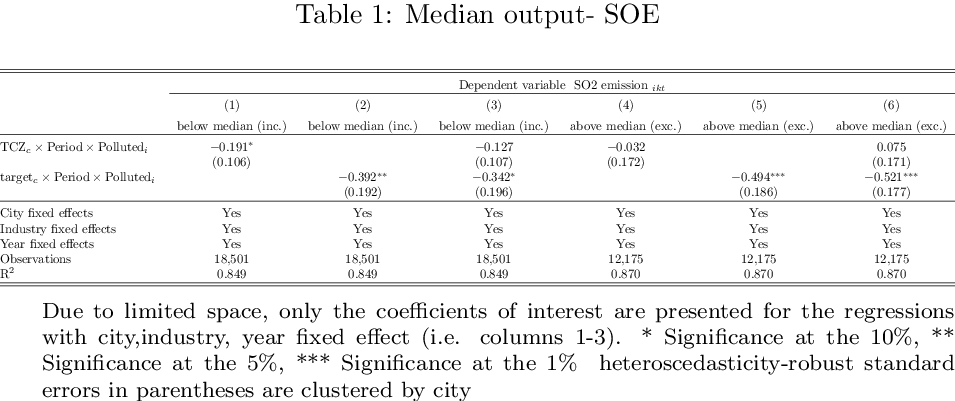

In [34]:
import os
decile=['& below median (inc.)', 'below median (inc.)', 'below median (inc.)',
        'above median (exc.)', 'above median (exc.)', 'above median (exc.)']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 1,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

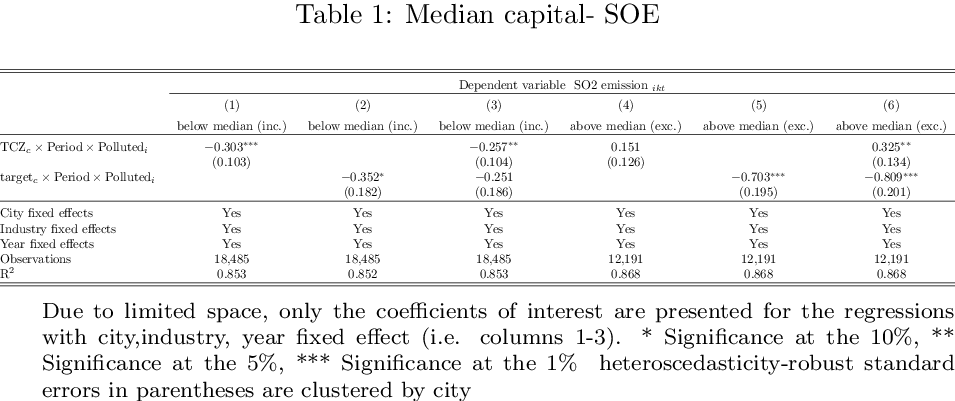

In [35]:
import os
decile=['& below median (inc.)', 'below median (inc.)', 'below median (inc.)',
        'above median (exc.)', 'above median (exc.)', 'above median (exc.)']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 2,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

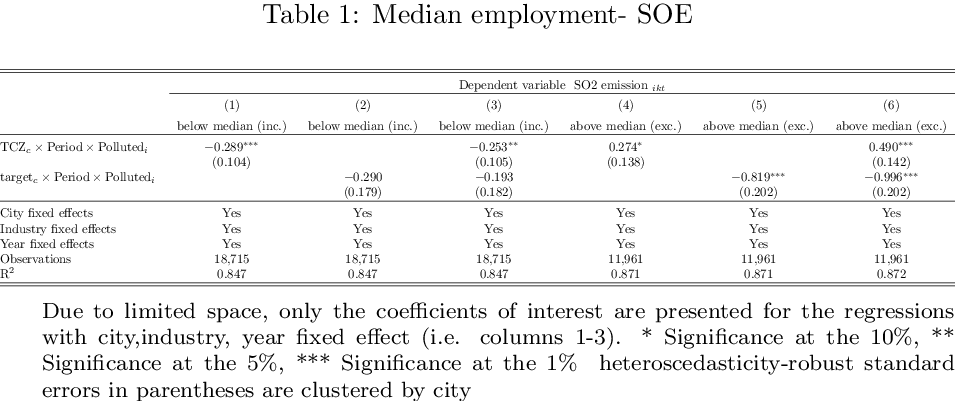

In [36]:
import os
decile=['& below median (inc.)', 'below median (inc.)', 'below median (inc.)',
        'above median (exc.)', 'above median (exc.)', 'above median (exc.)']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 3,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

## SPZ/Coastal

In [37]:
df_to_filter <- df_TCZ_list_china
### SPZ

### Remove text, tex and pdf files
toremove <- dir(path=getwd(), pattern=".tex|.pdf|.txt")
file.remove(toremove)

fe1 <- list(
    c("City fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("Industry fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
    c("Year fixed effects","Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes")
             )

for (var in range(1,2)){
    
    if (var == 1){
        filter_spz = 1
        filter_coast = TRUE
        filter_tcz = 'TCZ'
        
    }else if ( var == 2){
        
        filter_spz = 0
        filter_coast = FALSE
        filter_tcz = 'No_TCZ'
    }


    t1 <- felm(formula=log(tso2_cit) ~ 
               TCZ_c * Period * polluted_thre 
               + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(SPZ == filter_spz),
             exactDOF=TRUE)
    t1 <-change_target(t1)
    t2 <- felm(formula=log(tso2_cit) ~ 
           target_c  * Period * polluted_thre 
               + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(SPZ == filter_spz),
             exactDOF=TRUE)
    t2 <-change_target(t2)

    t3 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(SPZ == filter_spz),
             exactDOF=TRUE)
    t3 <-change_target(t3)

    ### Coastal
    t4 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(Coastal == filter_coast),
             exactDOF=TRUE)
    t4 <-change_target(t4)

    t5 <- felm(formula=log(tso2_cit) ~ 
           target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(Coastal == filter_coast),
             exactDOF=TRUE)
    t5 <-change_target(t5)

    t6 <- felm(formula=log(tso2_cit) ~ 
           TCZ_c * Period * polluted_thre 
           + target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_to_filter %>% filter(Coastal == filter_coast),
             exactDOF=TRUE)
    t6 <-change_target(t6)

    t7 <- felm(formula=log(tso2_cit) ~ 
           + target_c  * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final %>% filter(TCZ_c == filter_tcz),
             exactDOF=TRUE)
    t7 <-change_target(t7)
    
     if (var == 1){
        tables_1 <- list(t1, t2, t3,t4, t5, t6, t7)
        table_1 <- go_latex(tables_1,
                dep_var = "Dependent variable \\text { SO2 emission }_{i k t}",
                title="SPZ/Coastal/TCZ True",
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name="table_1.txt"
                            )
        
    }else if (var == 2){
        
        tables_2 <- list(t1, t2, t3,t4, t5, t6, t7)
        table_1 <- go_latex(tables_2,
                dep_var = "Dependent variable \\text { SO2 emission }_{i k t}",
                title="SPZ/Coastal/TCZ False",
                addFE=fe1,
                save=TRUE,
                note = FALSE,
                name="table_2.txt"
                            )
    }
    
}

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

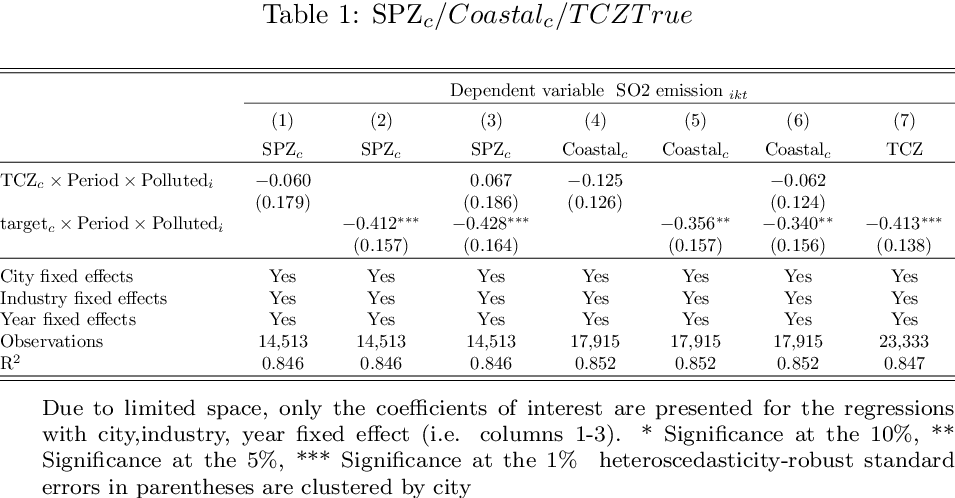

In [38]:
import os
decile=['& SPZ', 'SPZ', 'SPZ',
        'Coastal', 'Coastal', 'Coastal', 'TCZ']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 1,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

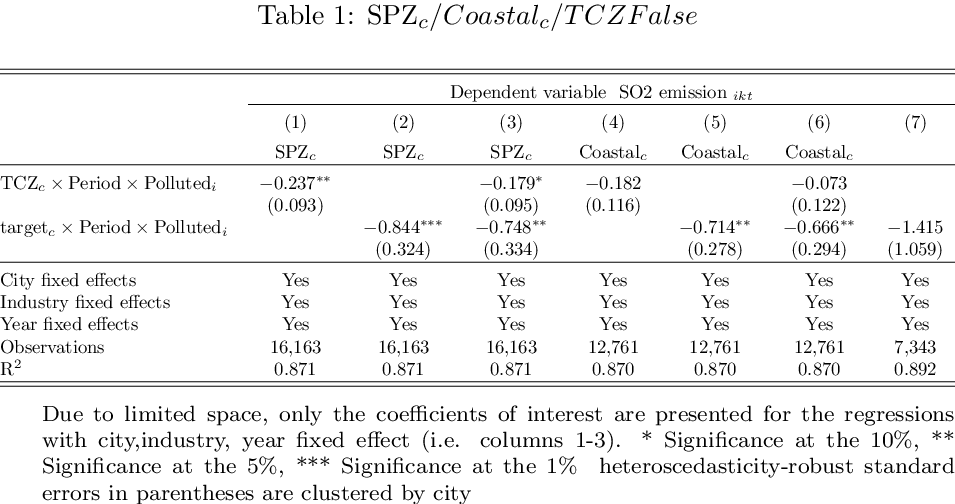

In [39]:
import os
decile=['& SPZ', 'SPZ', 'SPZ',
        'Coastal', 'Coastal', 'Coastal']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 2,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

# Create Report

In [40]:
import os, time, shutil
from pathlib import Path

filename = '08_SBC_pollution_China_Revision_New_tables_i'
source = filename + '.ipynb'
source_to_move = filename + '.html'
path = os.getcwd()
parent_path = str(Path(path).parent)
path_report = "{}/Reports".format(parent_path)
dest = os.path.join(path_report, filename)+'.html'

os.system('jupyter nbconvert --no-input --to html {}'.format(source))
shutil.move(source_to_move, dest)

time.sleep(5)
for i in range(1, 19):
    try:
        os.remove("table_{}.pdf".format(i))
        os.remove("table_{}.tex".format(i))
        os.remove("table_{}.txt".format(i))
    except:
        pass